### 1. Importación de Librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2. Inicialización de Datos

- DataFrame de Viajes

In [ ]:
rides = pd.read_csv('data/PFDA_rides.csv')

- DataFrame de Clima

In [ ]:
weather = pd.read_csv('data/PFDA_weather.csv')

### 3. Exploración Inicial de los Datos

#### DATOS DE LOS VIAJES

In [ ]:
rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,11.0,1,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,7.0,1,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,26.0,1,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,9.0,1,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


- Existen diferentes tipos de viajes.
- El precio varía por cada tipo de viaje.


In [ ]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  float64
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  int64  
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


- Hay 693071 registros en total.
- Tenemos 10 columnas, contando con tipos de valores enteros, flotantes y objeto.

In [ ]:
rides['time_stamp'] = pd.to_datetime(rides['time_stamp'], unit='ms')
rides['day'] = rides['time_stamp'].dt.day_name()
rides

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,day
0,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,5.0,1,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,Sunday
1,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,11.0,1,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,Sunday
2,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,7.0,1,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,Sunday
3,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,26.0,1,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,Sunday
4,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,9.0,1,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,2018-12-02 00:20:00,North End,West End,13.0,1,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Sunday
693067,1.00,Uber,2018-12-02 00:20:00,North End,West End,9.5,1,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,Sunday
693068,1.00,Uber,2018-12-02 00:20:00,North End,West End,NaN,1,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,Sunday
693069,1.00,Uber,2018-12-02 00:20:00,North End,West End,27.0,1,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,Sunday


In [ ]:
rides.groupby("cab_type")["name"].value_counts()

cab_type  name        
Lyft      Lux             51235
          Lux Black       51235
          Lux Black XL    51235
          Lyft            51235
          Lyft XL         51235
          Shared          51233
Uber      Black SUV       55096
          UberXL          55096
          WAV             55096
          Black           55095
          Taxi            55095
          UberX           55094
          UberPool        55091
Name: count, dtype: int64

In [ ]:
rides.surge_multiplier.unique()

array([1, 2, 3])

In [ ]:
rides.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,693071,637976.000000,693071.000000
mean,2.189430,2018-12-05 21:35:09.213053184,16.545125,1.014287
min,0.020000,2018-11-26 02:40:00,2.500000,1.000000
25%,1.280000,2018-11-28 21:20:00,9.000000,1.000000
50%,2.160000,2018-12-02 08:40:00,13.500000,1.000000
75%,2.920000,2018-12-14 23:26:40,22.500000,1.000000
max,7.860000,2018-12-18 19:06:40,97.500000,3.000000
std,1.138937,NaN,9.324359,0.118818


- Hallamos estadísticos relevantes para analizar.
- Todo parece uniforme excepto la variable 'precio', que tiene la media un poco por encima de la mediana, indicando un sesgo positivo.

#### 3.1  Exploración de Tipos de Viajes

In [ ]:
rides["name"].nunique()

13

In [ ]:
rides.name.unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

- Tenemos 13 tipos de viajes disponibles.

#### 3.2  Exploración de Lugares de Partida

In [ ]:
rides.source.nunique()

12

In [ ]:
rides.source.unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

- Tenemos 12 puntos de partida.

####  3.3 Exploración de Lugares de Destino

In [ ]:
rides.destination.nunique()

12

In [ ]:
rides.destination.unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

- Tenemos 12 puntos de destino.

#### 3.4  Exploración de Empresas con las que Trabajamos

In [ ]:
rides["cab_type"].nunique()

2

In [ ]:
rides["cab_type"].unique()

array(['Lyft', 'Uber'], dtype=object)

- Tenemos 2 empresas de viajes en automóvil.

#### DATOS DE LAS CONDICIONES CLIMÁTICAS

In [ ]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


- Tenemos 6276 registros en total.
- Hay 8 columnas con el tipo de dato flotante en su mayoría. Tenemos también tipos enteros y objeto.

In [ ]:
weather['time_stamp'] = pd.to_datetime(weather['time_stamp'], unit='s')
weather['day'] = weather['time_stamp'].dt.day_name()
weather

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,day
0,42.42,Back Bay,1.00,1012.14,0.1228,2018-12-16 23:45:01,0.77,11.25,Sunday
1,42.43,Beacon Hill,1.00,1012.15,0.1846,2018-12-16 23:45:01,0.76,11.32,Sunday
2,42.50,Boston University,1.00,1012.15,0.1089,2018-12-16 23:45:01,0.76,11.07,Sunday
3,42.11,Fenway,1.00,1012.13,0.0969,2018-12-16 23:45:01,0.77,11.09,Sunday
4,43.13,Financial District,1.00,1012.14,0.1786,2018-12-16 23:45:01,0.75,11.49,Sunday
...,...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,2018-12-03 06:52:54,0.96,1.52,Monday
6272,44.85,Northeastern University,0.88,1000.71,NaN,2018-12-03 06:52:54,0.96,1.54,Monday
6273,44.82,South Station,0.89,1000.70,NaN,2018-12-03 06:52:54,0.96,1.54,Monday
6274,44.78,Theatre District,0.89,1000.70,NaN,2018-12-03 06:52:54,0.96,1.54,Monday


In [ ]:
weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6276,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,2018-12-03 17:16:17.146430720,0.763985,6.802812
min,19.620000,0.000000,988.250000,0.000200,2018-11-26 03:40:44,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,2018-11-28 06:34:30,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,2018-11-29 17:52:54,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,2018-12-13 08:45:01,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,2018-12-18 18:45:02,0.990000,18.180000
std,6.022055,0.314284,12.870775,0.100758,NaN,0.127340,3.633466


- Hallamos estadísticos principales para análisis.
- En general casi todos los valores se ven uniformes, excepto 'clouds' y 'rain', que tienen variaciones entre su media y mediana. En el caso de 'clouds' es más significativo y tiene sesgo negativo, mientras que en 'rain' es un pequeño sesgo positivo.

#### 3.5  Exploración de Lugares con Registros Climáticos

In [ ]:
weather.location.nunique()

12

In [ ]:
weather.location.unique()

array(['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway',
       'Financial District', 'Haymarket Square', 'North End',
       'North Station', 'Northeastern University', 'South Station',
       'Theatre District', 'West End'], dtype=object)

- Tenemos 12 lugares con registros climáticos.

#### 3.6  Análisis de Media en Todas las Variables

In [ ]:
weather.groupby("location").mean(numeric_only=True)

,temp,clouds,pressure,rain,humidity,wind
location,,,,,,
Back Bay,39.082122,0.678432,1008.447820,0.056012,0.764073,6.778528
Beacon Hill,39.047285,0.677801,1008.448356,0.057097,0.765048,6.810325
Boston University,39.047744,0.679235,1008.459254,0.054688,0.763786,6.692180
Fenway,38.964379,0.679866,1008.453289,0.054863,0.767266,6.711721
Financial District,39.410822,0.676730,1008.435793,0.061352,0.754837,6.860019
Haymarket Square,39.067897,0.676711,1008.445239,0.059593,0.764837,6.843193
North End,39.090841,0.676730,1008.441912,0.058712,0.764054,6.853117
North Station,39.035315,0.676998,1008.442811,0.056542,0.765545,6.835755
Northeastern University,38.975086,0.678317,1008.444168,0.054197,0.767648,6.749426


- Los lugares tienden a tener condiciones climáticas casi similares en promedio.

### 4. Evaluación de Calidad de Datos

#### DATOS DE LOS VIAJES

####  4.1 Duplicados

In [ ]:
rides.duplicated().sum()

np.int64(0)

- No existen valores duplicados para los datos de los viajes.

#### 4.2 Nulos

In [ ]:
rides.isnull().sum()

,0
distance,0
cab_type,0
time_stamp,0
destination,0
source,0
price,55095
surge_multiplier,0
id,0
product_id,0
name,0


- Tenemos 55095 valores nulos en la columna de 'precio'.

In [ ]:
porcentaje_nulos = (rides["price"].isnull().mean() * 100).round(2)
print(f"Porcentaje de valores nulos en price: {porcentaje_nulos}%")

Porcentaje de valores nulos en price: 7.95%


- El porcentaje de nulos con respecto al total de datos es de 7.95%.

#### 4.3  Imputación de Datos

Antes de tomar una decisión, profundizamos un poco más en ver si por ejemplo, hay alguna o varías categoría de transporte que tienen precios nulos.

In [ ]:
rides.loc[rides["price"].isnull()==True,"name"].unique()

array(['Taxi'], dtype=object)

In [ ]:
rides.loc[rides["name"]=="Taxi", "cab_type"].unique()

array(['Uber'], dtype=object)

Observamos que la única categoría a la que le pertenecen esos datos nulos es la categoría 'Taxi' perteneciente a Uber. Miramos más a fondo.

In [ ]:
rides.loc[rides["name"]=="Taxi", "price"].isnull().count()

np.int64(55095)

In [ ]:
rides.loc[rides["name"]=="Taxi", "id"].count()

np.int64(55095)

Haciendo la comparación, en realidad toda la categoría 'Taxi' tiene sus precios nulos, por lo que no podemos tomar ninguna referencia cercana a la realidad para imputar sus datos. Por lo que vamos a hacer lo siguiente: Primero, crearemos una copia del DataFrame pero con los nulos eliminados, borrando así prácticamente toda la categoría 'Taxi' como si no existiera.

In [ ]:
rides_noprice = rides.dropna(subset=["price"])

In [ ]:
rides["price"] = rides.groupby("cab_type")["price"].transform(lambda x: x.fillna(x.median()))

- Imputamos los datos de precio nulos con la mediana de cada empresa.

In [ ]:
rides.isnull().sum()

,0
distance,0
cab_type,0
time_stamp,0
destination,0
source,0
price,0
surge_multiplier,0
id,0
product_id,0
name,0


- Ya no tenemos valores nulos.
- Se imputaron correctamente los datos!

#### 4.4 Outliers

In [ ]:
num_cols = ["distance", "time_stamp", "price", "surge_multiplier"]

- Seleccionamos las columnas numéricas.

In [ ]:
Q1 = rides[num_cols].quantile(0.25)
Q3 = rides[num_cols].quantile(0.75)
IQR = Q3 - Q1

- Calculamos los cuartiles y el rango intercuartílico.

In [ ]:
Q1

,0.25
distance,1.28
time_stamp,2018-11-28 21:20:00
price,9.5
surge_multiplier,1.0


- Primer cuartil.

In [ ]:
Q3

,0.75
distance,2.92
time_stamp,2018-12-14 23:26:40
price,22.5
surge_multiplier,1.0


- Tercer cuartil.

In [ ]:
IQR

,0
distance,1.64
time_stamp,16 days 02:06:40
price,13.0
surge_multiplier,0.0


- Rango intercuartílico.

In [ ]:
lower_limit = Q1 - 1.5 * IQR # límite inferior
upper_limit = Q3 + 1.5 * IQR # límite superior


- Calculamos los límites superiores e inferiores de los bigotes.

In [ ]:
lower_limit

,0
distance,-1.18
time_stamp,2018-11-04 18:10:00
price,-10.0
surge_multiplier,1.0


- Límite inferior.

In [ ]:
upper_limit

,0
distance,5.38
time_stamp,2019-01-08 02:36:40
price,42.0
surge_multiplier,1.0


- Límite superior.

In [ ]:
num_outliers_dist = ((rides["distance"] < lower_limit["distance"]) | (rides["distance"] > upper_limit["distance"])).sum()
porcent_outliers_dist = (num_outliers_dist / len(rides) * 100).round(2)

num_outliers_time = ((rides["time_stamp"] < lower_limit["time_stamp"]) | (rides["time_stamp"] > upper_limit["time_stamp"])).sum()
porcent_outliers_time = (num_outliers_time / len(rides) * 100).round(2)

num_outliers_price = ((rides["price"] < lower_limit["price"]) | (rides["price"] > upper_limit["price"])).sum()
porcent_outliers_price = (num_outliers_price / len(rides) * 100).round(2)

num_outliers_surge = ((rides["surge_multiplier"] < lower_limit["surge_multiplier"]) | (rides["surge_multiplier"] > upper_limit["surge_multiplier"])).sum()
porcent_outliers_surge = (num_outliers_surge / len(rides) * 100).round(2)

print(f"El número de outliers en la columna 'distance' es: {num_outliers_dist}, correspondiendo al {porcent_outliers_dist}% del total de datos.")
print(f"El número de outliers en la columna 'time_stamp' es: {num_outliers_time}, correspondiendo al {porcent_outliers_time}% del total de datos.")
print(f"El número de outliers en la columna 'price' es: {num_outliers_price}, correspondiendo al {porcent_outliers_price}% del total de datos.")
print(f"El número de outliers en la columna 'surge_multiplier' es: {num_outliers_surge}, correspondiendo al {porcent_outliers_surge}% del total de datos.")

El número de outliers en la columna 'distance' es: 8662, correspondiendo al 1.25% del total de datos.
El número de outliers en la columna 'time_stamp' es: 0, correspondiendo al 0.0% del total de datos.
El número de outliers en la columna 'price' es: 7982, correspondiendo al 1.15% del total de datos.
El número de outliers en la columna 'surge_multiplier' es: 9890, correspondiendo al 1.43% del total de datos.


#### DATOS DE LAS CONDICIONES CLIMÁTICAS

#### 4.5  Duplicados

In [ ]:
weather.duplicated().sum()

np.int64(0)

- No hay valores duplicados para los datos de las condiciones climáticas.

#### 4.6 Nulos

In [ ]:
weather.isnull().sum()

,0
temp,0
location,0
clouds,0
pressure,0
rain,5382
time_stamp,0
humidity,0
wind,0
day,0


- Tenemos 5382 valores nulos para la columna 'lluvia'.

In [ ]:
porcentaje_nulos = (weather["rain"].isnull().mean() * 100).round(2)
print(f"Porcentaje de valores nulos en rain: {porcentaje_nulos}%")

Porcentaje de valores nulos en rain: 85.76%


- El porcentaje de nulos con respecto al total de datos es de 85.76%.
- Un valor muy alto, y analizando con detenimiento, si hablamos de lluvia puede que los valores nulos representen que no hubo lluvia en ese momento.

In [ ]:
weather[weather["rain"] == 0]

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,day


- Corroboramos que no haya valores de 0 en la columna 'lluvia', ya que de ser el caso, el nulo no necesariamente represente una cantidad nula de lluvia.
- Al no haber valores de 0, asumimos que la cantidad nula de lluvia es porque no hubo lluvia. Es decir, 'rain' = 0.

In [ ]:
weather["rain"] = weather["rain"].fillna(0)

- Imputamos los datos nulos con el valor de 0.

#### 4.7  Outliers

In [ ]:
num_cols = ["temp", "pressure", "rain", "humidity", "wind"]

- Seleccionamos las columnas numéricas.

In [ ]:
Q1 = weather[num_cols].quantile(0.25)
Q3 = weather[num_cols].quantile(0.75)
IQR = Q3 - Q1

- Calculamos los cuartiles y el rango intercuartílico.

In [ ]:
Q1

,0.25
temp,36.0775
pressure,997.7475
rain,0.0000
humidity,0.6700
wind,3.5175


- Primer cuartil.

In [ ]:
Q3

,0.75
temp,42.8325
pressure,1018.4800
rain,0.0000
humidity,0.8900
wind,9.9200


- Tercer cuartil.

In [ ]:
IQR

,0
temp,6.7550
pressure,20.7325
rain,0.0000
humidity,0.2200
wind,6.4025


- Rango intercuartílico.

In [ ]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

- Calculamos los límites superiores e inferiores de los bigotes.

In [ ]:
lower_limit

,0
temp,25.94500
pressure,966.64875
rain,0.00000
humidity,0.34000
wind,-6.08625


- Límite inferior.

In [ ]:
upper_limit

,0
temp,52.96500
pressure,1049.57875
rain,0.00000
humidity,1.22000
wind,19.52375


- Límite superior.

In [ ]:
num_outliers_temp = ((weather["temp"] < lower_limit["temp"]) | (weather["temp"] > upper_limit["temp"])).sum()
porcent_outliers_temp = (num_outliers_temp / len(weather) * 100).round(2)

num_outliers_pres = ((weather["pressure"] < lower_limit["pressure"]) | (weather["pressure"] > upper_limit["pressure"])).sum()
porcent_outliers_pres = (num_outliers_pres / len(weather) * 100).round(2)

num_outliers_rain = ((weather["rain"] < lower_limit["rain"]) | (weather["rain"] > upper_limit["rain"])).sum()
porcent_outliers_rain = (num_outliers_rain / len(weather) * 100).round(2)

num_outliers_humid = ((weather["humidity"] < lower_limit["humidity"]) | (weather["humidity"] > upper_limit["humidity"])).sum()
porcent_outliers_humid = (num_outliers_humid / len(weather) * 100).round(2)

num_outliers_wind = ((weather["wind"] < lower_limit["wind"]) | (weather["wind"] > upper_limit["wind"])).sum()
porcent_outliers_wind = (num_outliers_wind / len(weather) * 100).round(2)

print(f"El número de outliers en la columna 'temp' es: {num_outliers_temp}, correspondiendo al {porcent_outliers_temp}% del total de datos.")
print(f"El número de outliers en la columna 'pressure' es: {num_outliers_pres}, correspondiendo al {porcent_outliers_pres}% del total de datos.")
print(f"El número de outliers en la columna 'rain' es: {num_outliers_rain}, correspondiendo al {porcent_outliers_rain}% del total de datos.")
print(f"El número de outliers en la columna 'humidity' es: {num_outliers_humid}, correspondiendo al {porcent_outliers_humid}% del total de datos.")
print(f"El número de outliers en la columna 'wind' es: {num_outliers_wind}, correspondiendo al {porcent_outliers_wind}% del total de datos.")

El número de outliers en la columna 'temp' es: 266, correspondiendo al 4.24% del total de datos.
El número de outliers en la columna 'pressure' es: 0, correspondiendo al 0.0% del total de datos.
El número de outliers en la columna 'rain' es: 894, correspondiendo al 14.24% del total de datos.
El número de outliers en la columna 'humidity' es: 0, correspondiendo al 0.0% del total de datos.
El número de outliers en la columna 'wind' es: 0, correspondiendo al 0.0% del total de datos.


#### ------------------ REFLEXIÓN ------------------

Para los datos de 'weather':
- Se observaron algunos valores fuera del rango esperado principalmente en las variables rain y temp.
- Estos representan condiciones climáticas inusuales más que errores, por lo que se conservaron para no perder información relevante del comportamiento real del clima.  

Para los datos de 'rides':
- Se identificaron valores atípicos en la variable price, distance y surge_multiplier.
- Estos valores podrían corresponder a viajes de lujo, trayectos largos o errores de registro.

La presencia de estos outliers puede afectar las medidas de tendencia central, como la media, haciendo que los precios promedio parezcan más altos de lo real. Por ello, es importante analizarlos antes de realizar comparaciones o modelos estadísticos.

### 5.  Análisis de Distribución de Variables

<Axes: xlabel='price', ylabel='Count'>

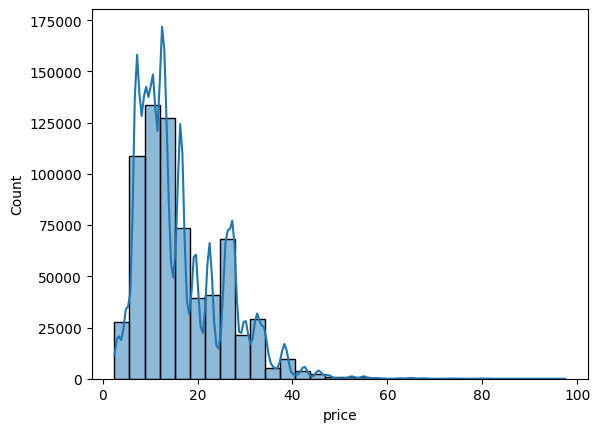

In [ ]:
sns.histplot(rides["price"], bins=30, kde=True)

El gráfico muestra que la mayoría de los precios de los viajes se concentran en el rango bajo, con una distribución sesgada hacia la derecha. Hay algunos valores atípicos con precios significativamente más altos, lo que indica que existen viajes más caros, pero son menos frecuentes.

<Axes: xlabel='cab_type', ylabel='price'>

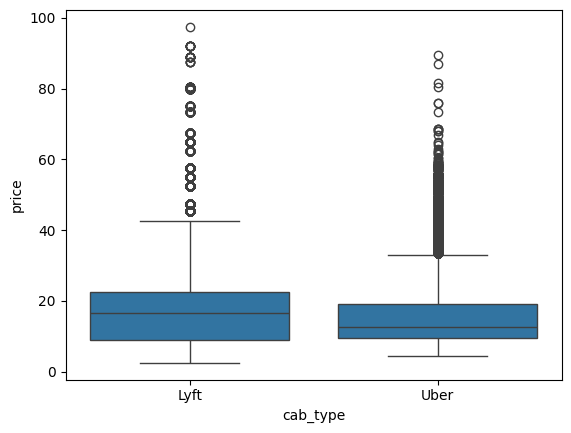

In [ ]:
sns.boxplot(x="cab_type", y="price", data=rides)

Se observa que la empresa Lyft tiene la distribución de precios ligeramente más amplia, lo que indica una mayor variabilidad en los precios de sus viajes en comparación con Uber. La mediana de Lyft está un poco más alta que la de Uber, lo que sugiere que, en promedio, los precios de los viajes en Lyft tienden a ser superiores a los de Uber. Además, ambos gráficos muestran la presencia de algunos valores atípicos (Con Lyft teniendo los más altos, por supuesto), pero no parecen ser excesivos ni afectar significativamente la distribución general de los precios en ambas empresas.

<Axes: xlabel='distance', ylabel='Count'>

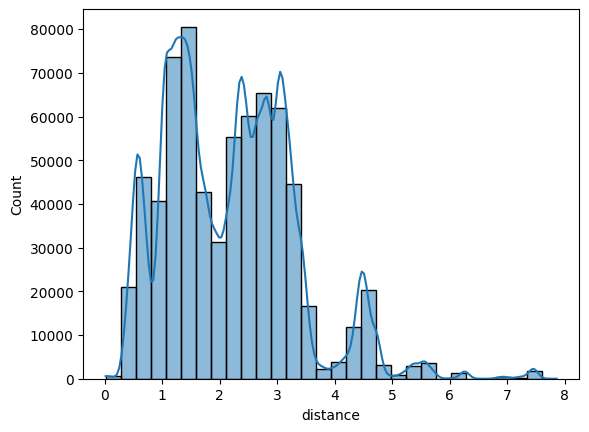

In [ ]:
sns.histplot(rides["distance"], bins=30, kde=True)

El gráfico muestra que la distancia de los viajes tiene una distribución sesgada hacia la derecha, con la mayoría de los viajes concentrados en distancias más cortas. Hay una disminución gradual en la frecuencia de los viajes a medida que la distancia aumenta, lo que indica que los viajes más largos son menos comunes.

<Axes: xlabel='destination', ylabel='source'>

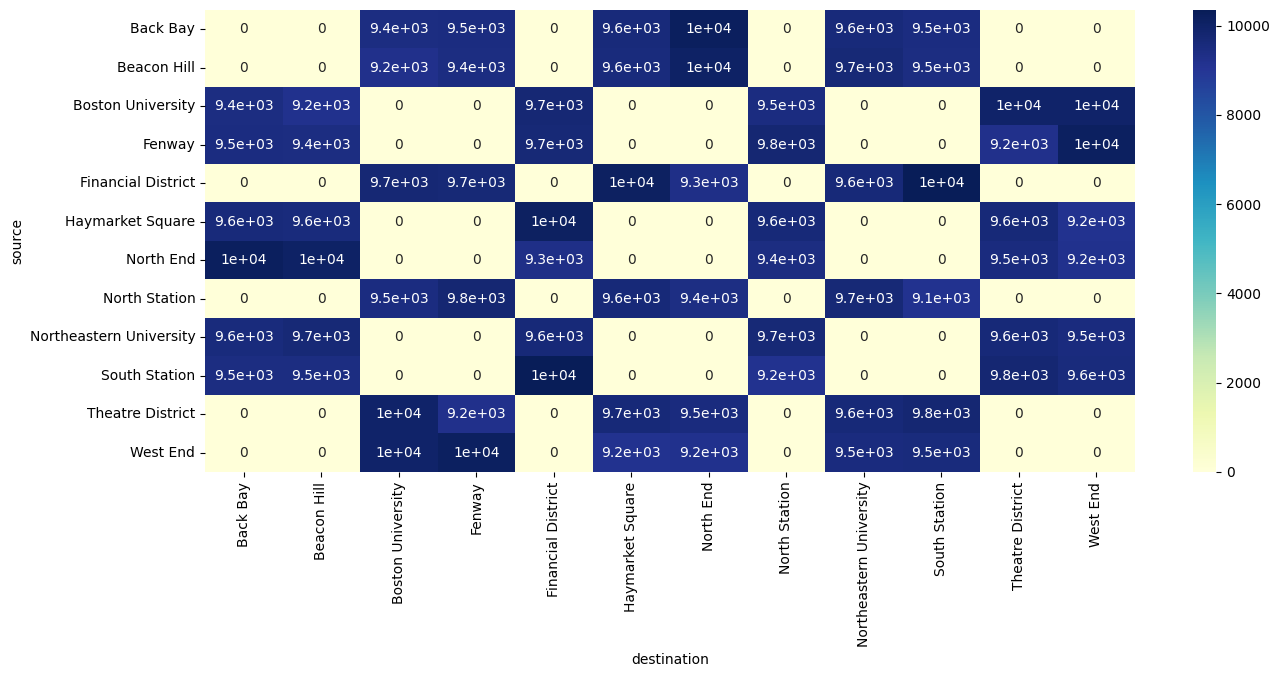

In [ ]:
tabla = pd.crosstab(rides["source"], rides["destination"])

plt.figure(figsize=(15, 6))
sns.heatmap(tabla, annot=True, cmap="YlGnBu")

En el mapa de calor se observa que ciertas combinaciones de origen y destino tienen una mayor frecuencia de viajes, lo que indica rutas populares entre los usuarios. Todas tienen una frecuencia similar, por lo que aunque sean las usuales de los usuarios, no hay una favorita que se superponga muy por encima de las demás.

### ***** ANÁLISIS EXPLORATORIO AVANZADO *****

---
#### ------------> Análisis de Variaciones de Precios por Factores Geográficos - Katherine Forero

*** Nota: ya que es un análisis basado en el precio y sus variaciones en torno a otras variables, se tomará el dataframe en el que se eliminaron los datos nulos del precio para evitar sacar conclusiones erróneas (ya se explica mejor al realizar la limpieza de los datos arriba).    
  
Para iniciar con el análisis, primero identifiquemos las variables más relevantes para este caso de estudio.  
- Si hablamos de factores geográficos, tiene que ver en sí mismo con lugares, rutas, distancia entre las zonas, etc. Por lo tanto, las variables de más importancia se considerarían las siguientes:

In [ ]:
rides_noprice[['price', 'distance', 'source', 'destination', 'cab_type', 'surge_multiplier']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   price             637976 non-null  float64
 1   distance          637976 non-null  float64
 2   source            637976 non-null  object 
 3   destination       637976 non-null  object 
 4   cab_type          637976 non-null  object 
 5   surge_multiplier  637976 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ MB


In [ ]:
rides_noprice[['price', 'distance', 'source', 'destination', 'cab_type', 'surge_multiplier']].describe()

,price,distance,surge_multiplier
count,637976.000000,637976.000000,637976.000000
mean,16.545125,2.189261,1.015521
std,9.324359,1.135413,0.123765
min,2.500000,0.020000,1.000000
25%,9.000000,1.270000,1.000000
50%,13.500000,2.160000,1.000000
75%,22.500000,2.930000,1.000000
max,97.500000,7.860000,3.000000


Con estos datos, podemos comenzar a inspeccionar las variables y relacionarlas hasta encontrar una posible conexión. Ahora no podemos olvidar que las rutas son esenciales, y aunque tengamos el source y el destination por separado, en muchos casos nos serviría tener una columna unificada de ambos. Adicionalmente, podemos obtener un precio por milla, que nos sería útil para analizar más a profundidad los precios (se explicará más adelante).

In [ ]:
rides_noprice['route'] = rides_noprice['source'] + ' -> ' + rides_noprice['destination']
rides_noprice['price_per_mile'] = rides_noprice['price'] / rides_noprice['distance']

/tmp/ipython-input-4259556778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides_noprice['route'] = rides_noprice['source'] + ' -> ' + rides_noprice['destination']
/tmp/ipython-input-4259556778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides_noprice['price_per_mile'] = rides_noprice['price'] / rides_noprice['distance']


- Ahora, empecemos haciendo una visualización para ver las distribuciones de las variables distancia y precio, que son las numéricas principales de nuestro caso de estudio.

<Axes: xlabel='distance', ylabel='Count'>

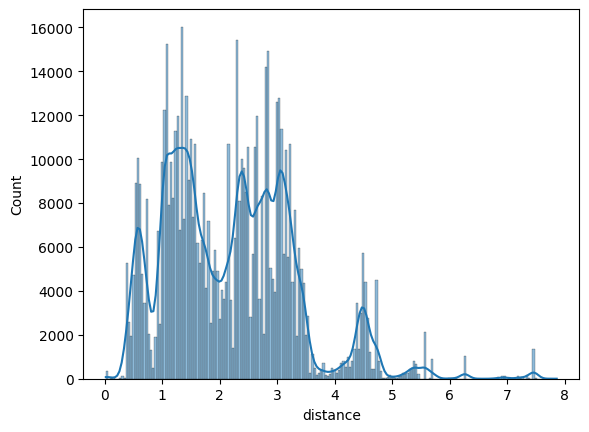

In [ ]:
sns.histplot(rides_noprice["distance"], kde=True)

<Axes: xlabel='price', ylabel='Count'>

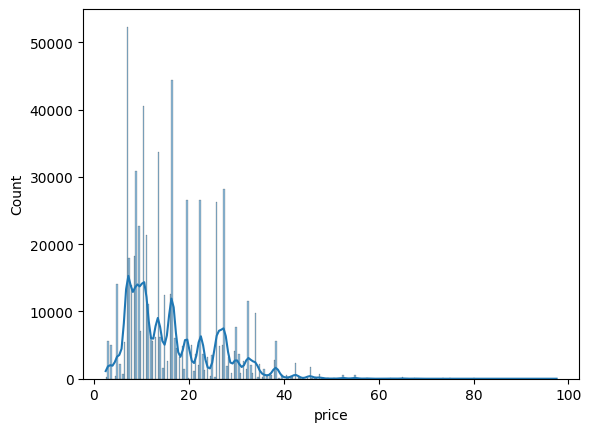

In [ ]:
sns.histplot(rides_noprice["price"], kde=True)

/tmp/ipython-input-1190430095.py:11: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  plt.figure(1,figsize=(12, 10))


<Axes: xlabel='destination', ylabel='source'>

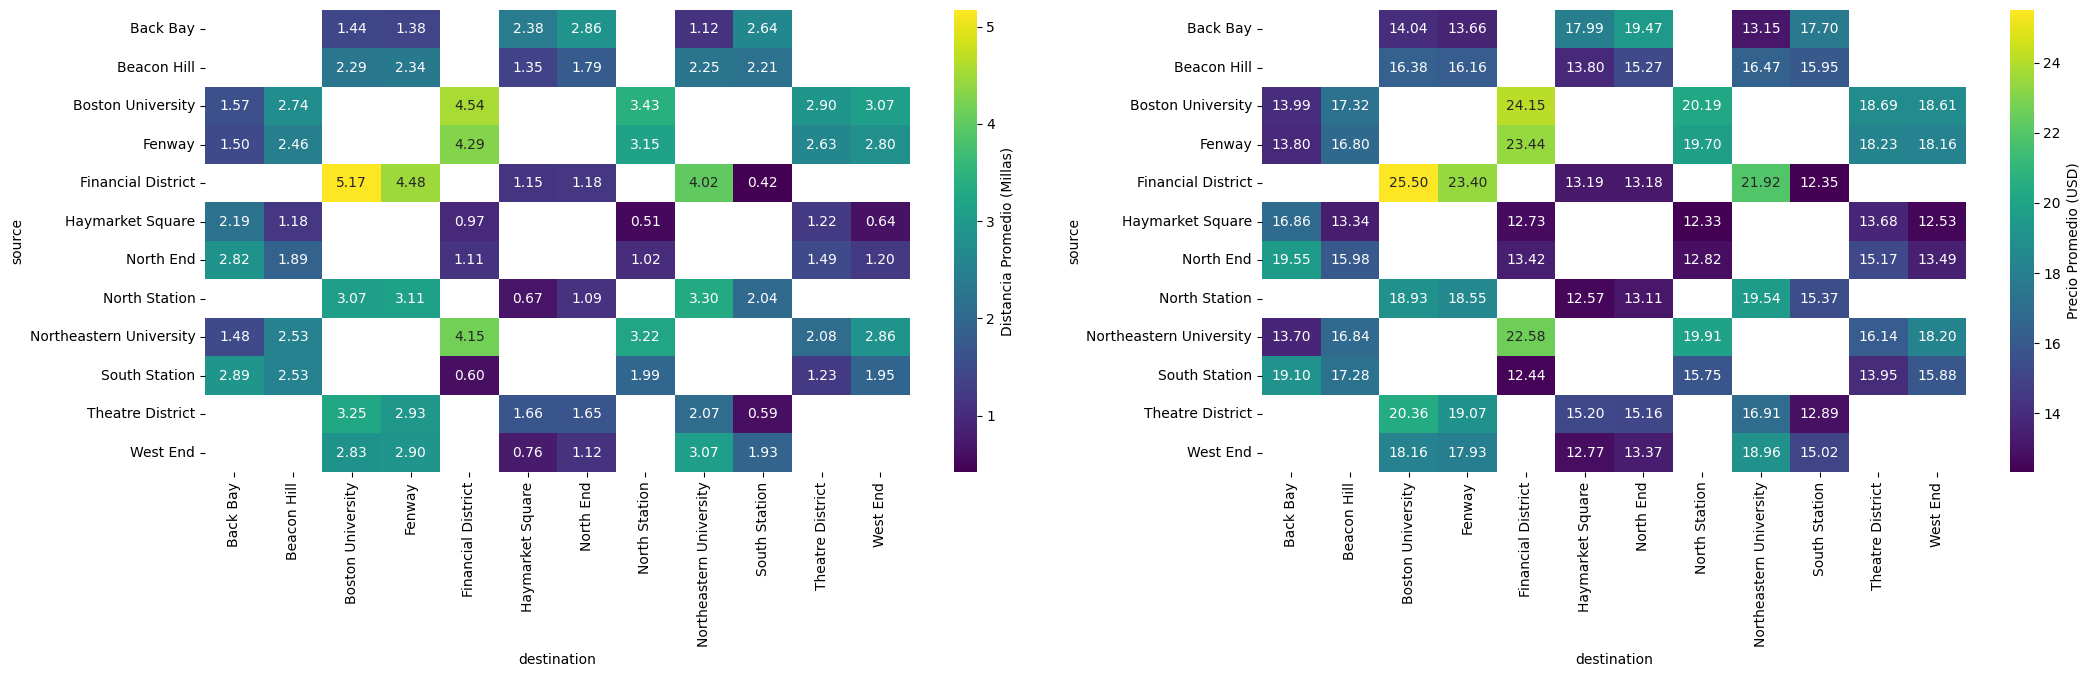

<Figure size 1200x1000 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(25, 6))

route_distance = rides_noprice.groupby(['source', 'destination'])['distance'].mean().reset_index()

data = route_distance.pivot_table(
    index='source',
    columns='destination',
    values='distance'
)

plt.figure(1,figsize=(12, 10))
sns.heatmap(
    data,
    annot=True,
    fmt=".2f", # Muestra los valores de distancia con dos decimales
    cmap='viridis',
    cbar_kws={'label': 'Distancia Promedio (Millas)'},
    ax=axs[0]
)
route_distance = rides_noprice.groupby(['source', 'destination'])['price'].mean().reset_index()

data = route_distance.pivot_table(
    index='source',
    columns='destination',
    values='price'
)

plt.figure(figsize=(12, 10))
sns.heatmap(
    data,
    annot=True,
    fmt=".2f", # Muestra los valores de distancia con dos decimales
    cmap='viridis',
    cbar_kws={'label': 'Precio Promedio (USD)'},
    ax=axs[1]
)

Al analizar los histogramas, podemos ver que la distancia de los viajes se concentran más entre 1 a 4 millas, por lo que viajes de más de eso son menos comunes. Así mismo en precio, se concentra en un rango de 0 y 30 dólares aproximadamente. De alguna manera, gracias a esta distribución en donde los valores de menor valor tienen más concentración que en cualquier otra parte de la gráfica, nos da la sensación de que ambas variables en efecto, tienen algún tipo de relación. En los mapas de calor así mismo se ve una cierta similitud al comparar ambos mapas, viendo que cuando tenemos altas distancias, el precio así mismo sube más de lo habitual y viceverse; sin embargo, vamos a verlo de forma más directa:

Text(0, 0.5, 'Precio (USD)')

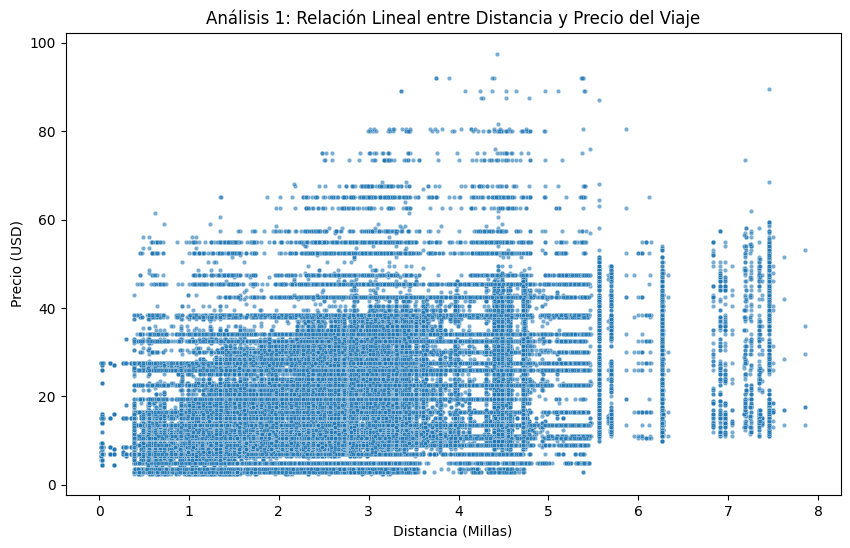

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='price', data=rides_noprice, alpha=0.6, s=10)
plt.title('Análisis 1: Relación Lineal entre Distancia y Precio del Viaje')
plt.xlabel('Distancia (Millas)')
plt.ylabel('Precio (USD)')

Al observar la gráfica de dispersión, como que de alguna manera si que hay una relación positiva inicialmente (si la distancia sube, el precio también y viceversa). Aunque hay puntos que se llegan a alejar bastante de la concentración de puntos, se ve que aunque no sea una relación muy definida, existe.

In [ ]:
rides_noprice[["price", "distance"]].corr()

,price,distance
price,1.000000,0.345061
distance,0.345061,1.000000


Para sacarnos la duda, obtenemos el coeficiente de relación de Pearson para corroborar que tanta relación lineal existe entre ambas. Como inferimos, si que hay una relación pero es algo debil tirando a media. Eso es porque hay más factores que influyen en el precio, las cuáles seguiremos analizando a lo largo de nuestro análisis.  
  
Ahora usaremos la variable de la que tanto hablamos hace no mucho: precio por millas. Uno se pregunta para qué se necesita si ya tengo el precio total; pero no es tan sencillo. Lo cierto es que aunque a mayor precio, más ganancia por rutas largas, no implica que estemos viendo el valor real de un viaje, pues aunque un viaje pueda ser más corto, la demanda y congestión de la zona podría influir bastante en el precio final.

In [ ]:
rides_noprice[(rides_noprice['distance'] < 1.5) & (rides_noprice['name'] == 'UberX')].head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,day,route,price_per_mile
14,1.11,Uber,2018-11-28 01:53:20,West End,North End,7.5,1,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,Wednesday,North End -> West End,6.756757
64,1.16,Uber,2018-11-30 15:00:00,West End,North End,9.5,1,c9dee6ef-eca0-43ba-9bf9-ec00a6638164,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,Friday,North End -> West End,8.189655
204,1.30,Uber,2018-12-02 22:33:20,Theatre District,South Station,9.5,1,f77944e3-c2c0-4dce-bc44-0829b876c99a,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,Sunday,South Station -> Theatre District,7.307692
260,1.40,Uber,2018-11-27 03:40:00,Boston University,Back Bay,7.5,1,0b50bd4f-188d-430a-b934-cfad0bc27199,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,Tuesday,Back Bay -> Boston University,5.357143
349,1.16,Uber,2018-12-03 04:06:40,West End,North End,8.5,1,da6eff37-75c2-4619-8b1e-652c23cee18c,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,Monday,North End -> West End,7.327586


Por ejemplo, al hacer una breve inspección vemos que hay dos viajes en UberX (porque sí, el tipo de transporte/servicio que se elige si influye directamente en el precio final, así que en este caso era relevante inspeccionar viajes del mismo tipo) que tienen mismo punto de partida y destino, y la distancia también es la misma. La diferencia es la fecha en la que se realizaron, uno realizado el día viernes, y el otro el día lunes. Esto nos lleva a pensar que sí el tipo de servicio y todo lo demás es prácticamente igual, el principal causal posible es la demanda y la temporalidad, que van de la mano.

In [ ]:
rides_noprice.loc[(rides_noprice['time_stamp'] == '2018-11-30 15:00:00') & (rides_noprice['source'] == 'West End'), 'id'].count()

np.int64(420)

In [ ]:
rides_noprice.loc[(rides_noprice['time_stamp'] == '2018-12-03 4:06:40') & (rides_noprice['source'] == 'West End'), 'id'].count()

np.int64(384)

Al contar el número de viajes en cada una de las fechas, horas y lugar de partida correspondientes a cada viaje, vemos que en la fecha y hora del viaje del viernes en su respectiva zona, hubieron unas 30 personas más aproximadamente en comparación con la fecha y hora del viaje del lunes. Aquí confirmamos que, en efecto, el precio por milla que se ve mayor en el viaje del viernes, es por la demanda de los usuarios, que creció ligeramente. Por ello incluso si se tiene la misma distancia, tipo de servicio y lugar de partida, el viaje del viernes es más 'valioso' a nivel monetario.  
  
Confirmamos entonces que la demanda es un factor que nos puede afectar un precio, incluso si tenemos distancias similares.

/tmp/ipython-input-639696367.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_source.index, y=avg_price_by_source.values, palette='viridis', ax=axs[0])
/tmp/ipython-input-639696367.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_route.index, y=avg_price_by_route.values, palette='viridis', ax=axs[1])
/tmp/ipython-input-639696367.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_surge_by_route.index, y=avg_surge_by_route.values, palette='magma', ax=axs1[0])
/tmp/ipython-input-639696367.py:42: Futu

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Financial District -> South Station'),
  Text(1, 0, 'South Station -> Financial District'),
  Text(2, 0, 'North End -> Back Bay'),
  Text(3, 0, 'Back Bay -> North End'),
  Text(4, 0, 'West End -> Fenway')])

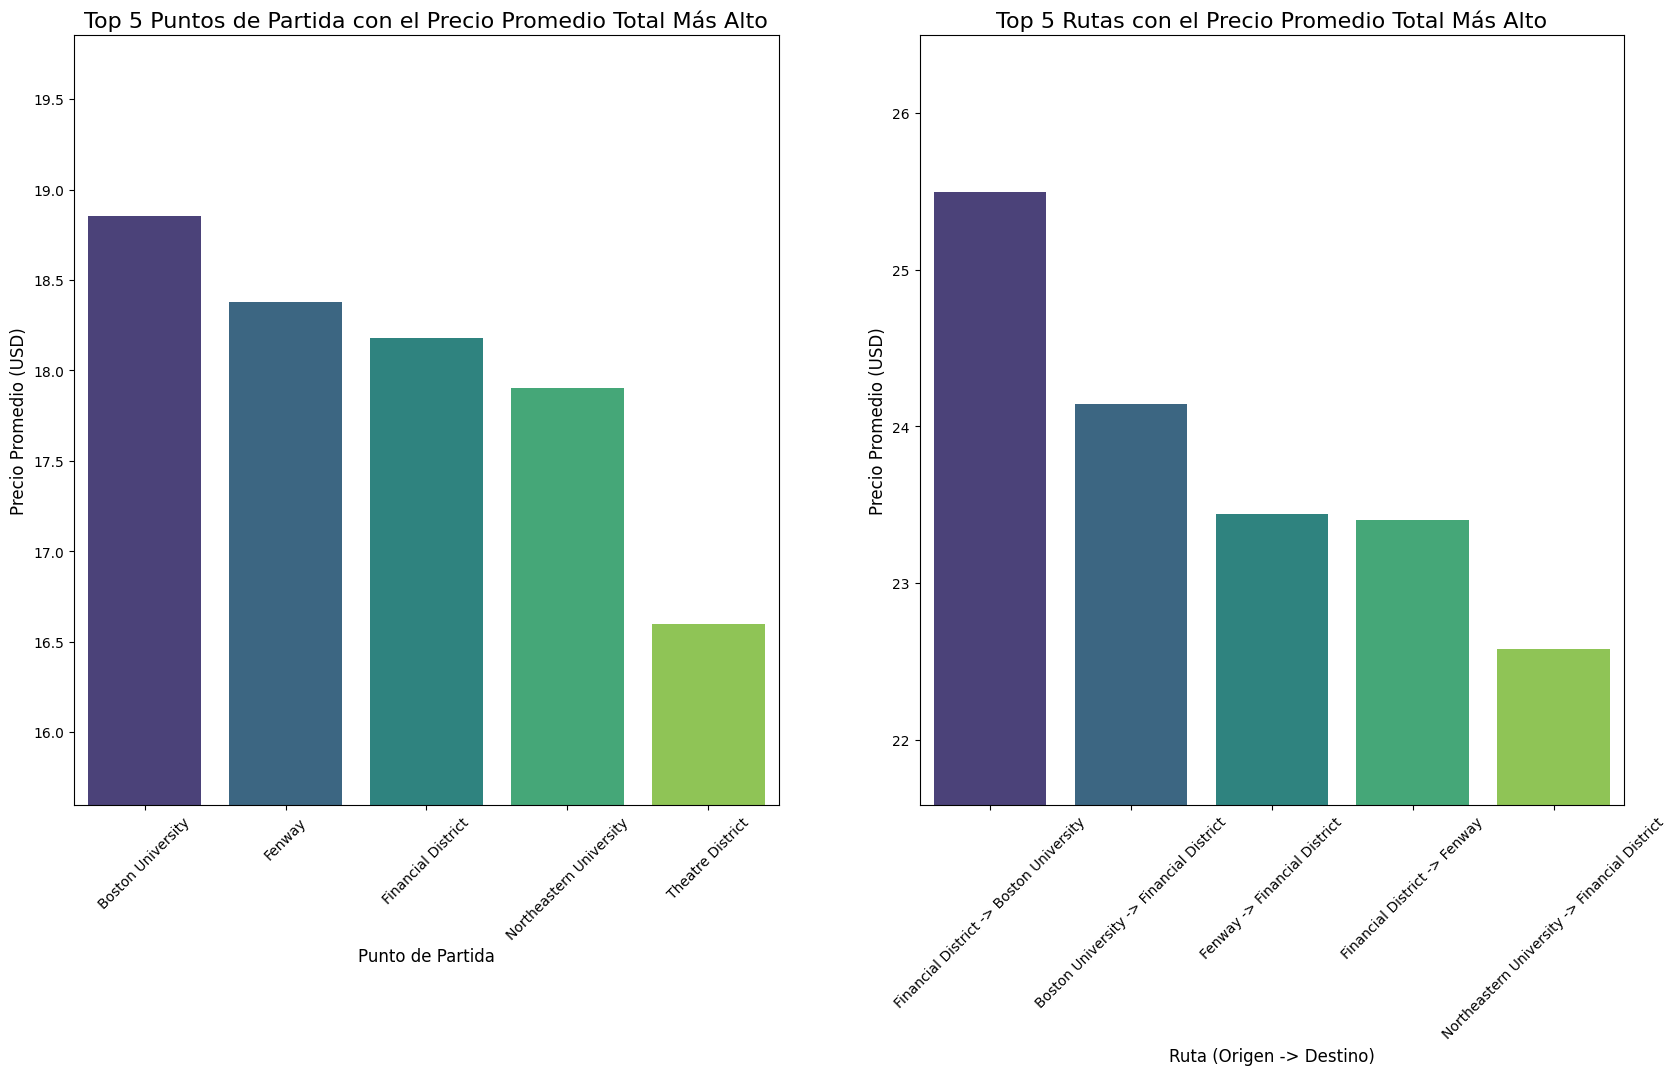

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

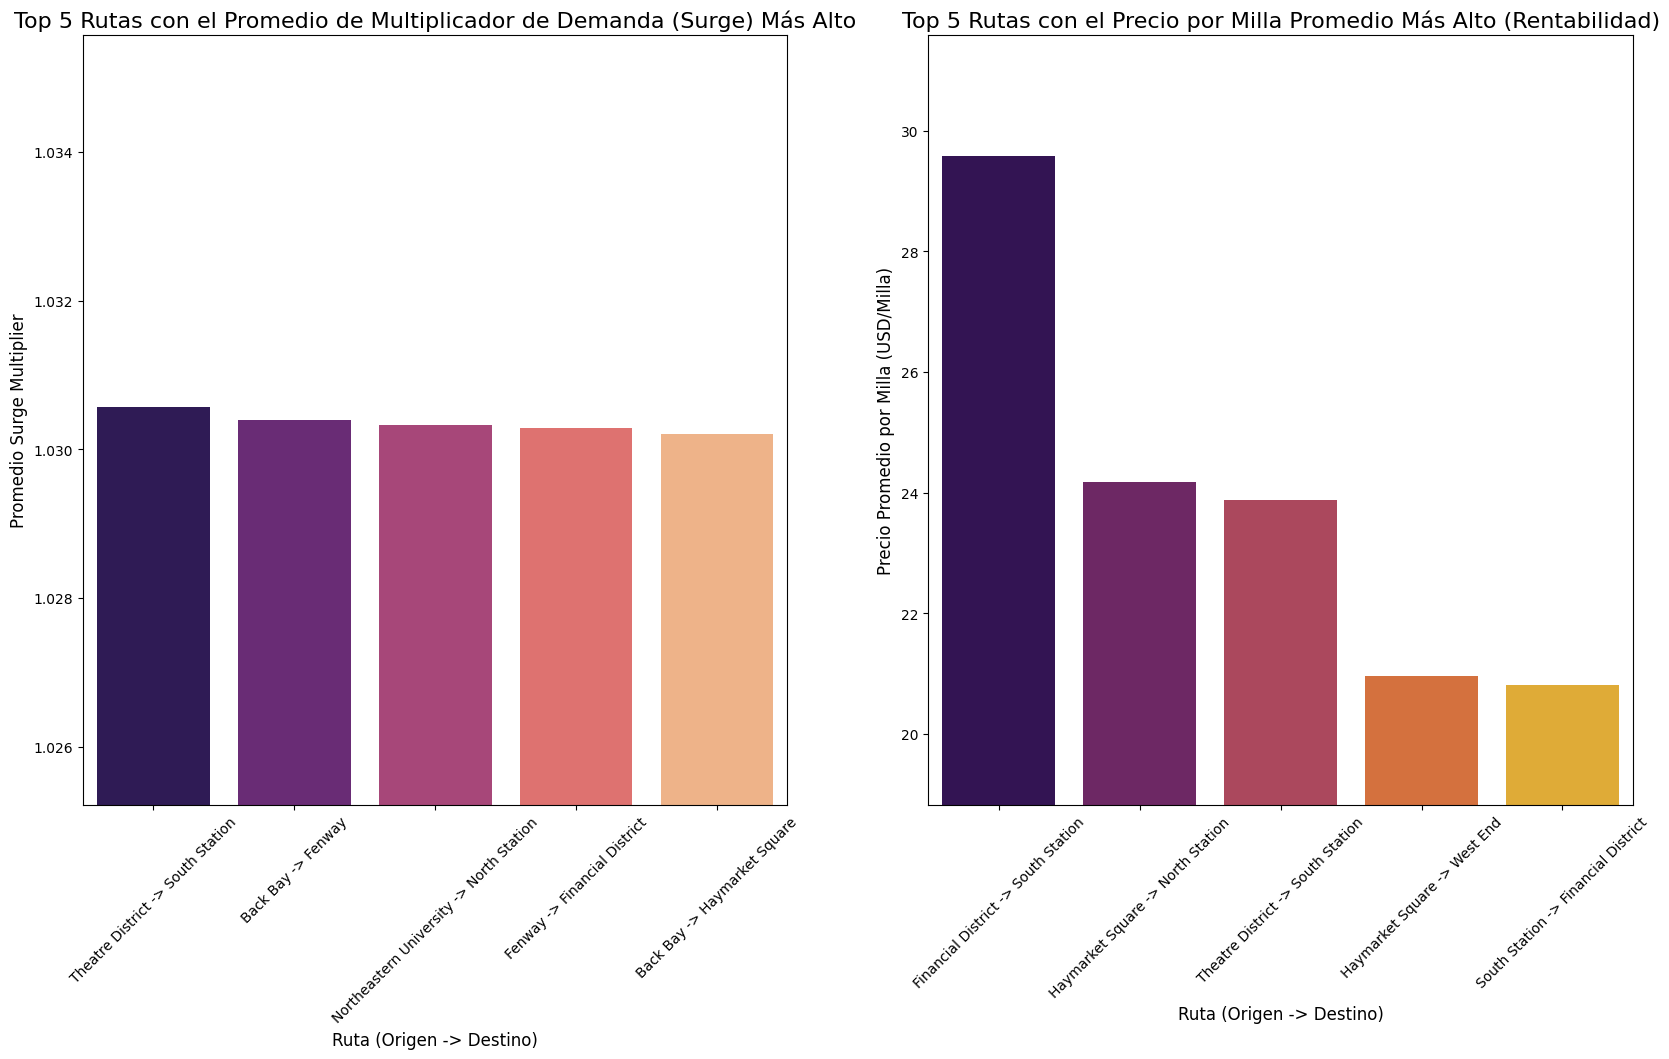

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

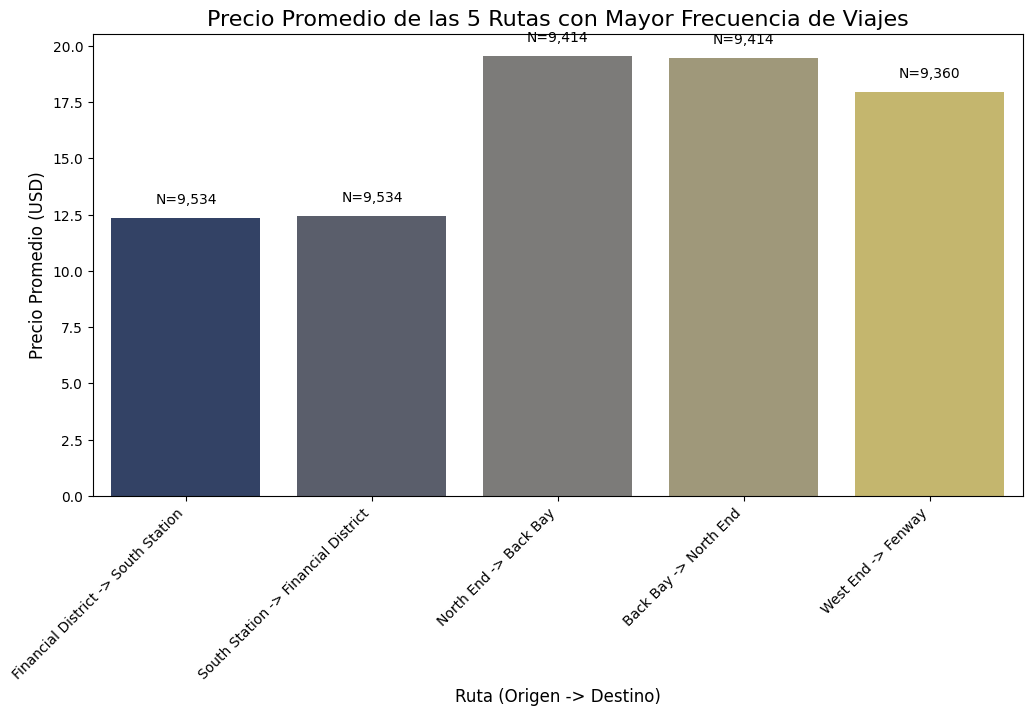

In [ ]:
figs, axs = plt.subplots(1, 2, figsize=(20, 10))

avg_price_by_source = rides_noprice.groupby('source')['price'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_source.index, y=avg_price_by_source.values, palette='viridis', ax=axs[0])
axs[0].set_title('Top 5 Puntos de Partida con el Precio Promedio Total Más Alto', fontsize=16)
axs[0].set_xlabel('Punto de Partida', fontsize=12)
axs[0].set_ylabel('Precio Promedio (USD)', fontsize=12)
axs[0].tick_params(axis='x', rotation=45) # Usar tick_params para rotación
axs[0].set_ylim(avg_price_by_source.min() - 1, avg_price_by_source.max() + 1)


avg_price_by_route = rides_noprice.groupby('route')['price'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_route.index, y=avg_price_by_route.values, palette='viridis', ax=axs[1])
axs[1].set_title('Top 5 Rutas con el Precio Promedio Total Más Alto', fontsize=16)
axs[1].set_xlabel('Ruta (Origen -> Destino)', fontsize=12)
axs[1].set_ylabel('Precio Promedio (USD)', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_ylim(avg_price_by_route.min() - 1, avg_price_by_route.max() + 1)


figs1, axs1 = plt.subplots(1, 2, figsize=(20, 10))


avg_surge_by_route = rides_noprice.groupby('route')['surge_multiplier'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 10))
sns.barplot(x=avg_surge_by_route.index, y=avg_surge_by_route.values, palette='magma', ax=axs1[0])
axs1[0].set_title('Top 5 Rutas con el Promedio de Multiplicador de Demanda (Surge) Más Alto', fontsize=16)
axs1[0].set_xlabel('Ruta (Origen -> Destino)', fontsize=12)
axs1[0].set_ylabel('Promedio Surge Multiplier', fontsize=12)
axs1[0].tick_params(axis='x', rotation=45)
axs1[0].set_ylim(avg_surge_by_route.min() - 0.005, avg_surge_by_route.max() + 0.005)


avg_ppm_by_route = rides_noprice.groupby('route')['price_per_mile'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_ppm_by_route.index, y=avg_ppm_by_route.values, palette='inferno', ax=axs1[1])
axs1[1].set_title('Top 5 Rutas con el Precio por Milla Promedio Más Alto (Rentabilidad)', fontsize=16)
axs1[1].set_xlabel('Ruta (Origen -> Destino)', fontsize=12)
axs1[1].set_ylabel('Precio Promedio por Milla (USD/Milla)', fontsize=12)
axs1[1].tick_params(axis='x', rotation=45)
axs1[1].set_ylim(avg_ppm_by_route.min() - 2, avg_ppm_by_route.max() + 2)



route_counts = rides_noprice['route'].value_counts()
top_5_frequent_routes = route_counts.head(5).index

# Calcula el precio promedio solo para las 5 rutas más frecuentes.
avg_price_of_top_5_frequent = rides_noprice[rides_noprice['route'].isin(top_5_frequent_routes)].groupby('route')['price'].mean().reindex(top_5_frequent_routes)

counts_for_chart = route_counts.head(5).reindex(top_5_frequent_routes)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_price_of_top_5_frequent.index, y=avg_price_of_top_5_frequent.values, palette='cividis')

# Añadir etiquetas de frecuencia (N) sobre las barras
for i, (route, price) in enumerate(avg_price_of_top_5_frequent.items()):
    count = counts_for_chart[route]
    ax.text(i, price + 0.5, f'N={count:,}', ha='center', va='bottom', fontsize=10)


plt.title('Precio Promedio de las 5 Rutas con Mayor Frecuencia de Viajes', fontsize=16)
plt.xlabel('Ruta (Origen -> Destino)', fontsize=12)
plt.ylabel('Precio Promedio (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')

En base a las gráficas, vemos que varía mucho la zona y las rutas. Como tal, en los dos primeros gráficas se observa que Boston University, Fenway y Financial District son los que tienen precios en promedio más altos como punto de partida. Así mismo cuando vemos las rutas que generan más ingresos en promedio incluyen mayormente estas locaciones. Sin embargo, cuando analizamos el multiplicador y el precio por millas, otras zonas como Theatre District o South Station aparecen. Esto significa que en cuestión de rentabilidad son mejores por decirlo de algún modo (ya que tienen el multiplicador más alto, debido ya sea a demanda u otras condiciones; y el precio por milla que indica que tan rentable es un viaje con respecto a la distancia recorrida). Se puede ganar más dinero con estas últimas recorriendo menos millas, pero si hablamos a nivel general, las que generan más ingresos son las primeras que se ven en el gráfico y que mencionamos, incluso si recorremos más millas.

### Insights Encontrados:
- Podemos decir que la distancia es el mayor motor del precio, puesto que como vimos, eso es lo que genera más ingresos incluso si su valor por milla es menor. Esto constituye lo que podría llamarse un recargo geográfico. Algo considerado justificado por las largas distancias a recorrerse.
- Tenemos otro enfoque, que es el precio por milla, indicándonos la rentabilidad de un viaje, maximizando precios por la distancia, normalmente causado por alta congestión o costo de tiempo. Esto último puede llegar a inflar los precios de una manera sorprendente, lo que podría ser percibido como injusto y podría ser recibido con quejas por parte de los usuarios. Hay que manejar este tema con cautela y equilibrando todo lo mejor posible para no perjudicar tanto al usuario como al conductor.
- El multiplicador para tarifa dinámica es una herramienta clave para estabilizar la oferta ante los picos de demanda por parte de los usuarios. Por ello no se ve en mayor frecuencia del todo, pero aparte de ser rentable, nos aseguramos de poder abarcar toda la demanda de nuestros clientes con esta estrategia.
- El punto más importante de una empresa de viajes en este caso podemoso observar que son las rutas con precios moderados, generalmente cortas o medias. Esto ayuda a mantener la cuota de mercado, y se recupera cualquier costo por medio de las rutas de larga distancia o aquellas que son más concurridas.

---
#### ------------> Análisis de Variaciones de Precios por Servicio y Ruta - Fernando Larrosa


In [ ]:
rides["type_serv"] = rides.cab_type + "-" + rides.name
rides["route"] = rides["source"] + " → " + rides["destination"]
len(rides["route"].unique())

72

Insight 1: Dominio del Mercado por Ruta

In [ ]:
# 1. Contar viajes por ruta y tipo de compañía
count_route = rides.groupby(["route", "cab_type"]).size().reset_index(name="count")

# 2. Para cada ruta, encontrar la compañía con el máximo de viajes (idxmax)
top_route = count_route.loc[count_route.groupby("route")["count"].idxmax()]

# 3. Contar cuántas rutas domina cada compañía
print("Rutas dominadas por compañía:")
top_route.cab_type.value_counts()

Rutas dominadas por compañía:


,count
cab_type,
Uber,72


In [ ]:
# Calcular la suma total de precios por compañía
rides.groupby("cab_type")["price"].sum()

,price
cab_type,
Lyft,5333957.98
Uber,5910122.50


In [ ]:
# 1. Calcular el total de viajes por tipo de servicio
service_counts = rides.groupby('type_serv').size().reset_index(name='total_trips')

# 2. Calcular los ingresos totales por tipo de servicio
service_revenue = rides.groupby('type_serv')['price'].sum().reset_index(name='total_revenue')

# 3. Combinar y calcular precio promedio
service_summary = pd.merge(service_counts, service_revenue, on='type_serv')
service_summary['avg_price'] = service_summary['total_revenue'] / service_summary['total_trips']

print("Resumen de rendimiento por tipo de servicio:")
service_summary.sort_values('avg_price', ascending=False)




Resumen de rendimiento por tipo de servicio:


,type_serv,total_trips,total_revenue,avg_price
2,Lyft-Lux Black XL,51235,1656124.55,32.324086
7,Uber-Black SUV,55096,1668679.50,30.286763
1,Lyft-Lux Black,51235,1181605.55,23.062468
6,Uber-Black,55095,1130758.00,20.523786
0,Lyft-Lux,51235,910509.50,17.771240
11,Uber-UberXL,55096,863803.00,15.678144
4,Lyft-Lyft XL,51235,784375.20,15.309363
8,Uber-Taxi,55095,688687.50,12.500000
10,Uber-UberX,55094,537997.00,9.765074
12,Uber-WAV,55096,538013.50,9.765019


/tmp/ipython-input-1332826191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=service_summary, x='type_serv', y='avg_price', palette='magma')


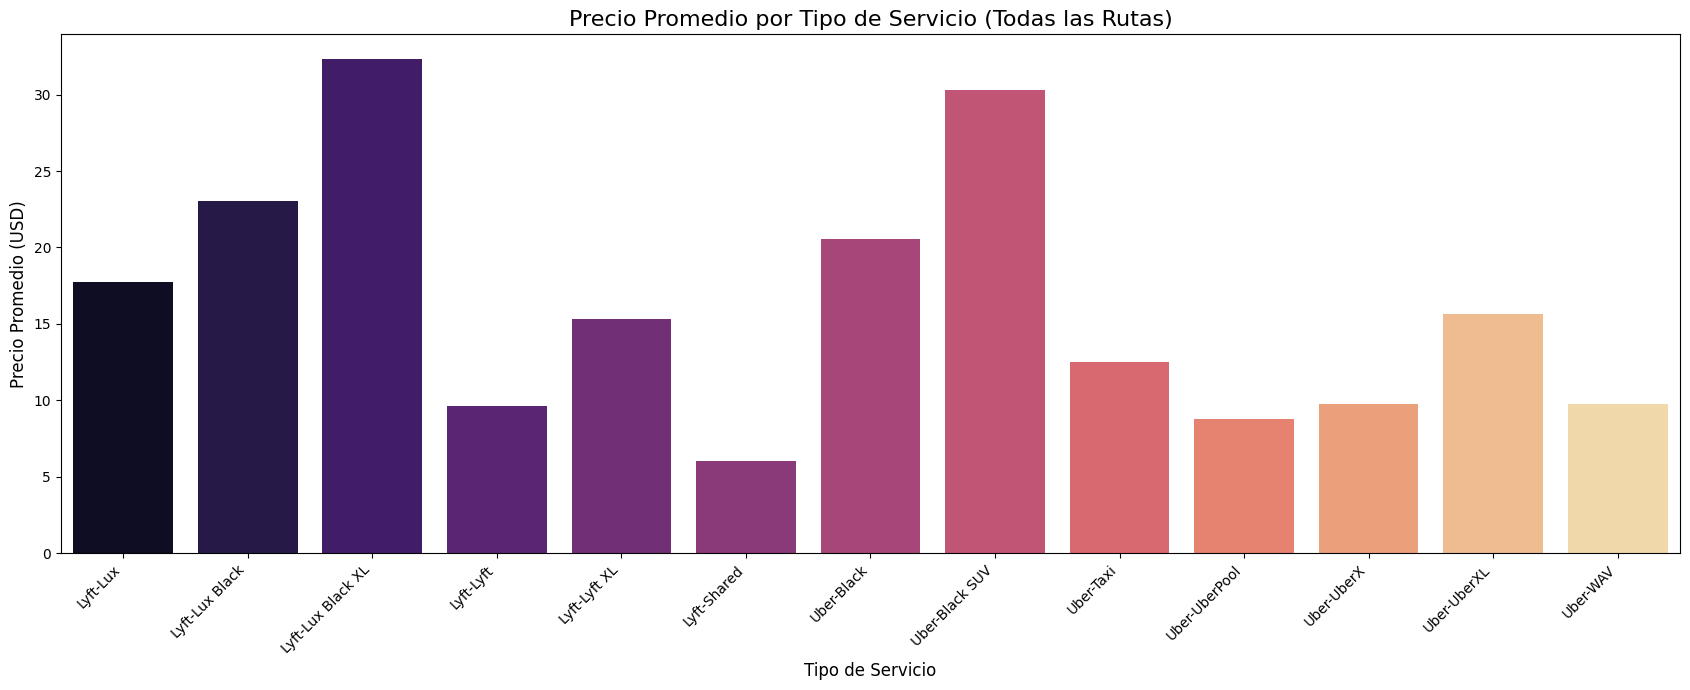

In [ ]:
plt.figure(figsize=(17, 7))
sns.barplot(data=service_summary, x='type_serv', y='avg_price', palette='magma')
plt.title('Precio Promedio por Tipo de Servicio (Todas las Rutas)', fontsize=16)
plt.xlabel('Tipo de Servicio', fontsize=12)
plt.ylabel('Precio Promedio (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
avg_price_by_route = rides.groupby('route')['price'].mean().sort_values(ascending=False)

print("Top 5 Rutas con Mayor Precio Promedio (General):")
avg_price_by_route.head()

Top 5 Rutas con Mayor Precio Promedio (General):


,price
route,
Financial District → Boston University,24.466430
Boston University → Financial District,23.221450
Fenway → Financial District,22.574424
Financial District → Fenway,22.542135
Northeastern University → Financial District,21.786745


/tmp/ipython-input-3362139960.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_on_route.index, y=avg_price_on_route.values, palette='magma')


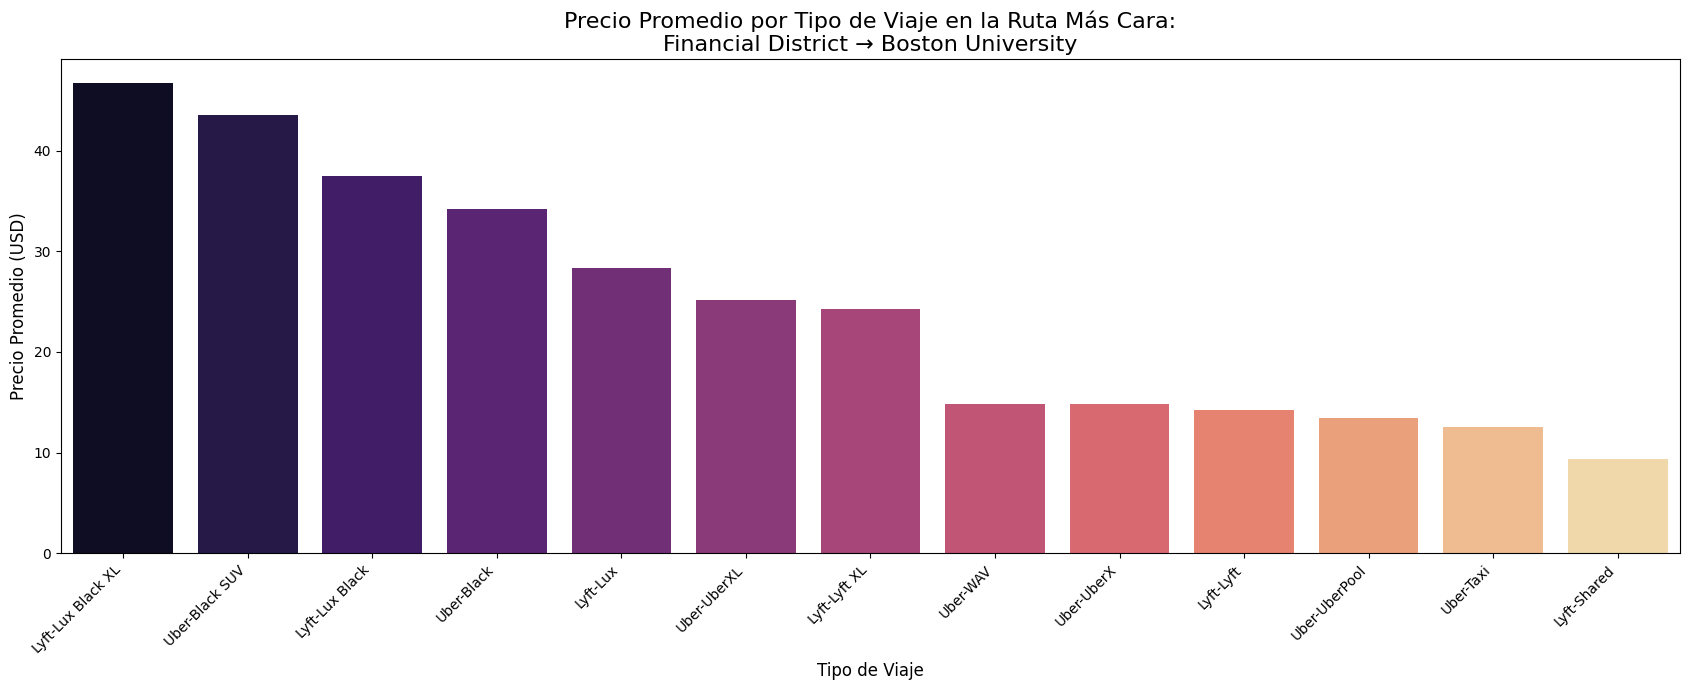

In [ ]:
# Tomar la ruta más cara del insight anterior
most_expensive_route = avg_price_by_route.index[0]
prices_route = rides[rides['route'] == most_expensive_route]

# Calcular el precio promedio por tipo de servicio EN ESA RUTA
avg_price_on_route = prices_route.groupby('type_serv')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(17, 7))
sns.barplot(x=avg_price_on_route.index, y=avg_price_on_route.values, palette='magma')
plt.title(f'Precio Promedio por Tipo de Viaje en la Ruta Más Cara:\n{most_expensive_route}', fontsize=16)
plt.xlabel('Tipo de Viaje', fontsize=12)
plt.ylabel('Precio Promedio (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

***Analisis por factores climaticos lluvia y temperatura***

In [ ]:
rides["time_stamp"].info()

In [ ]:
weather["time_stamp"].info()

# **verificamos el tipo de dato de la columna time_stamp en el dataset de condiciones climaticas**

In [ ]:
weather["time_stamp"] = pd.to_datetime(weather["time_stamp"])


# **Convertimos time_stamp a formato datetime**

In [ ]:
weather["fecha"] = weather["time_stamp"].dt.date
weather["hora"] = weather["time_stamp"].dt.hour
weather[["time_stamp", "fecha", "hora", "temp", "rain", "humidity", "wind"]].head()

# Promedios del clima por hora

In [ ]:


clima_horas = (
    weather
    .groupby("hora", as_index=False)[["temp", "rain", "humidity", "wind"]]
    .mean()
)

clima_horas.head()


# calculamos los promedios por hora

In [ ]:
rides["time_stamp"] = pd.to_datetime(rides["time_stamp"])
rides["hora"] = rides["time_stamp"].dt.hour

In [ ]:
precios_por_hora = (
    rides
    .groupby("hora", as_index=False)["price"]
    .mean()
)

precios_por_hora.head()

# **Usamos Merge para unir las tablas**



In [ ]:
df_horas = precios_por_hora.merge(clima_horas, on="hora", how="inner")
df_horas.head()

# **Filtramos los datos para indicar que dias llueve y que dias no**

In [ ]:
df_horas["llueve"] = df_horas["rain"] > 0.01
horas_lluvia = df_horas[df_horas["llueve"]]
horas_sin_lluvia = df_horas[~df_horas["llueve"]]

# **Grafico de dia de lluvia versus precio**

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(horas_lluvia["hora"], horas_lluvia["price"], marker="o", label="Con lluvia")
plt.plot(horas_sin_lluvia["hora"], horas_sin_lluvia["price"], marker="o", label="Sin lluvia")

plt.xticks(range(0, 24))
plt.xlabel("Hora del día")
plt.ylabel("Precio promedio")
plt.title("Variación del precio por hora según presencia de lluvia")
plt.grid(alpha=0.3)
plt.legend()

plt.show()

# **Realizamos la pasrte de unir con las empresas**

In [ ]:
precios_empresa_hora = rides.groupby(["hora", "cab_type"])["price"].mean().reset_index()
precios_empresa_hora.head()

In [ ]:
df_clima_empresa = precios_empresa_hora.merge(clima_horas, on="hora", how="inner")
df_clima_empresa.head()

In [ ]:
df_clima_empresa = precios_empresa_hora.merge(clima_horas, on="hora", how="inner")

# Crear columna de lluvia para df_clima_empresa
df_clima_empresa["llueve"] = df_clima_empresa["rain"] > 0.01

In [ ]:
datos_lluvia = df_clima_empresa[
    (df_clima_empresa["cab_type"] == empresa) &
    (df_clima_empresa["llueve"])

# **Grafico de la lluvia en el precio por hora de uber y lyft**

In [ ]:
plt.figure(figsize=(12,8))

for empresa in df_clima_empresa["cab_type"].unique():
    datos_lluvia = df_clima_empresa[
        (df_clima_empresa["cab_type"] == empresa) &
        (df_clima_empresa["llueve"])
    ]
    datos_no_lluvia = df_clima_empresa[
        (df_clima_empresa["cab_type"] == empresa) &
        (~df_clima_empresa["llueve"])
    ]

    plt.plot(
        datos_lluvia["hora"],
        datos_lluvia["price"],
        marker="o",
        label=f"{empresa} - Con lluvia"
    )
    plt.plot(
        datos_no_lluvia["hora"],
        datos_no_lluvia["price"],
        marker="o",
        linestyle="--",
        label=f"{empresa} - Sin lluvia"
    )

plt.xticks(range(0,24))
plt.xlabel("Hora del día")
plt.ylabel("Precio promedio")
plt.title("Impacto de la lluvia en el precio por hora de uber y lyft")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# **Analisis por temperatura**

In [ ]:
weather["time_stamp"] = pd.to_datetime(weather["time_stamp"])
weather["hora"] = weather["time_stamp"].dt.hour

clima_horas = (
    weather
    .groupby("hora", as_index=False)[["temp"]]
    .mean()
)

rides["time_stamp"] = pd.to_datetime(rides["time_stamp"])
rides["hora"] = rides["time_stamp"].dt.hour

precios_empresa_hora = (
    rides
    .groupby(["hora", "cab_type"], as_index=False)["price"]
    .mean()
)

df_temp_empresa = precios_empresa_hora.merge(clima_horas, on="hora", how="inner")

temp_promedio = df_temp_empresa["temp"].mean()
df_temp_empresa["categoria_temp"] = np.where(
    df_temp_empresa["temp"] >= temp_promedio,
    "Temperatura alta",
    "Temperatura baja"
)

resumen_temp_empresa = (
    df_temp_empresa
    .groupby(["cab_type", "categoria_temp"], as_index=False)["price"]
    .mean()
)

print("Precio promedio por empresa según categoría de temperatura:")
print(resumen_temp_empresa)

***Gráfico de barras comparando precio por empresa y temperatura***

In [ ]:
plt.figure(figsize=(8,5))

empresas = resumen_temp_empresa["cab_type"].unique()
x = np.arange(len(empresas))

precios_baja = resumen_temp_empresa[resumen_temp_empresa["categoria_temp"] == "Temperatura baja"]["price"].values
precios_alta = resumen_temp_empresa[resumen_temp_empresa["categoria_temp"] == "Temperatura alta"]["price"].values

ancho = 0.35

plt.bar(x - ancho/2, precios_baja, width=ancho, label="Temperatura baja")
plt.bar(x + ancho/2, precios_alta, width=ancho, label="Temperatura alta")

plt.xticks(x, empresas)
plt.ylabel("Precio promedio")
plt.title("Precio promedio por empresa según nivel de temperatura")
plt.grid(axis="y", alpha=0.3)
plt.legend()
plt.show()